# IMPORTING LIBRARIES

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import pandas as pd
import numpy as np

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#  LOADING AND READING THE DATASET

In [36]:
df = pd.read_csv("TV_Final.xls")
df

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3
...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4


In [37]:
dataset = df.copy()

# ABOUT THE DATASET

The dataset provides information about various television models. 

In [38]:
print("no of rows and columns: ",df.shape)

no of rows and columns:  (912, 7)


In [39]:
print("number of elements: ",df.size)

number of elements:  6384


In [40]:
df.columns

Index(['Brand', 'Resolution', 'Size ', 'Selling Price', 'Original Price',
       'Operating System', 'Rating'],
      dtype='object')

EACH FEATURE TELLS ABOUT:
  -  Brand : The brand name of the television manufacturer (e.g., TOSHIBA, TCL, realme, Mi, SONY).
  -  Resolution : The display resolution of the television (e.g., Ultra HD, QLED Ultra HD, HD).
  -  Size : The size of the television screen in inches.
  -  Selling Price : The current selling price of the television model.
  -  Original Price : The original or list price of the television model before any discounts or promotions.
  -  Operating System : The operating system used by the television (e.g., VIDAA, Android, Linux).
  -  Rating : The rating of the television model, presumably based on user reviews or some other metric.

In [41]:
df.dtypes

Brand                object
Resolution           object
Size                  int64
Selling Price         int64
Original Price        int64
Operating System     object
Rating              float64
dtype: object

# MISSING VALUES AND DUPLICATES

In [42]:
df.isna().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

- misssing values present in the Operating system (11) and Rating(220)

<Axes: >

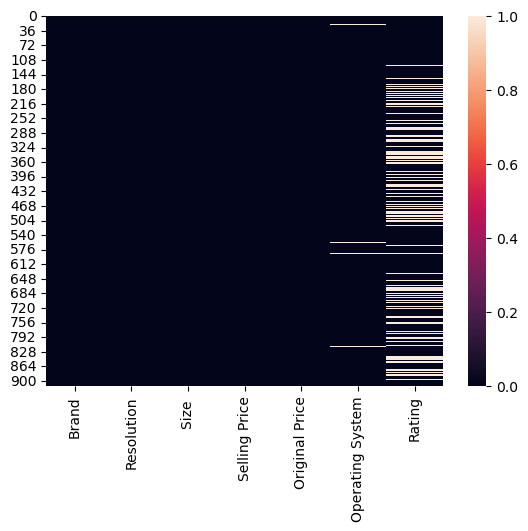

In [43]:
sns.heatmap(df.isna())

In [44]:
df['Operating System'].fillna(df['Operating System'].mode()[0], inplace=True)


In [45]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [46]:
df.isna().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

- now all missing values are replaced by mean and mode

In [47]:
df.duplicated().any()

True

- True represents there are same names for brand tv etc

# EXPLORATORY DATA ANALYSIS

## DESCRIPTIVE ANALYSIS


In [48]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,912,59,SAMSUNG,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resolution,912,5,Ultra HD LED,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,912.0,NaN,NaN,NaN,45.942982,12.316492,17.0,32.0,43.0,55.0,85.0
Selling Price,912.0,NaN,NaN,NaN,59358.60636,65866.677856,4849.0,19797.5,36990.0,67064.25,499990.0
Original Price,912.0,NaN,NaN,NaN,81975.213816,84823.568826,6999.0,28990.0,52900.0,99900.0,549990.0
Operating System,912,7,Android,485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,912.0,NaN,NaN,NaN,4.234104,0.319363,2.0,4.2,4.234104,4.4,5.0


- now there is no missing values
- there are `59` unique brands and `SAMSUNG` with most frequent brand(140 times) 
- there are `5` unique display resolutions and `Ultra HD LED`(399) is the most common 
- The sizes range from a minimum of 17 inches to a maximum of 85 inches, with an average size of approximately 45.94 inches.
- Selling prices vary widely, with a minimum of 4,849 and a maximum of 499,990.The mean selling price is 59,358.61.
- Original prices also exhibit a considerable range, from 6,999 to 549,990.
- There are 7 unique operating systems, with `Android`(485 times) being the most common .
- Ratings range from a minimum of 2 to a maximum of 5, with an average rating of 4.23.

## UNIVARIABLE ANALYSIS

## Demand for different types of televisions and Number of Players in the market

In [49]:
print('   different types of resolutions   :'.title())
print("--------------------------------")
print(df['Resolution'].value_counts())

   Different Types Of Resolutions   :
--------------------------------
Ultra HD LED     399
HD LED           229
Full HD LED      220
QLED Ultra HD     60
HD Plasma          4
Name: Resolution, dtype: int64


Text(0.5, 1.0, 'RESOLUTION ANALYSIS')

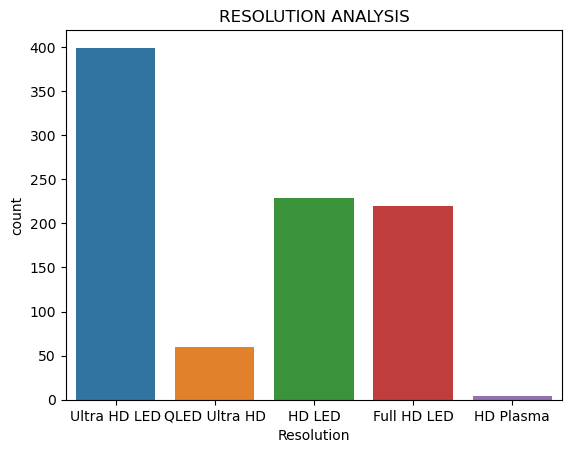

In [50]:
sns.countplot(data=df,x="Resolution")
plt.title("RESOLUTION ANALYSIS")

- There is a high demand for televisions with `Ultra HD` resolution, indicating a preference for higher picture quality.

In [51]:
print('different types of television brands : '.title())
print("--------------------------------")
print(df['Brand'].value_counts())

Different Types Of Television Brands : 
--------------------------------
SAMSUNG             140
LG                  122
SONY                 62
TCL                  44
Panasonic            30
Micromax             25
Vu                   23
Lloyd                22
Mi                   19
iFFALCON by TCL      19
Thomson              18
Haier                18
Sansui               18
PHILIPS              17
Blaupunkt            15
KODAK                15
MOTOROLA             15
IMPEX                13
TOSHIBA              13
Croma                12
Candes               12
Onida                12
Power Guard          11
Nokia                11
T-Series             11
Hisense              10
CloudWalker           9
OnePlus               9
RGL                   9
Acer                  9
Coocaa                9
AISEN                 8
MarQ by Flipkart      8
Sharp                 8
Onix                  8
G-TEN                 8
realme                7
Adsun                 7
Intex          

## Which are the top 5 brands for television?


In [52]:
top_brands = df['Brand'].value_counts(ascending=False).head(5)
top_brands


SAMSUNG      140
LG           122
SONY          62
TCL           44
Panasonic     30
Name: Brand, dtype: int64

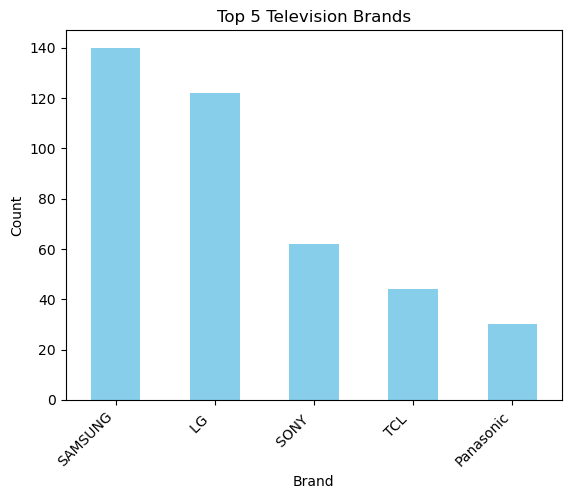

In [53]:
top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 5 Television Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- `SAMSUNG` and `LG` emerge as the leading brands, possibly indicating a high level of consumer trust and market influence.

## Which brand has the highest number of products i.e. television ?

In [54]:
brand_with_most_products = df['Brand'].value_counts().idxmax()
print("Brand with the Highest Number of Products:")
print(brand_with_most_products)


Brand with the Highest Number of Products:
SAMSUNG


## Are televisions with higher ratings more expensive?

In [55]:
ratings_vs_prices = df[['Rating', 'Selling Price']]

In [56]:
ratings_vs_prices.value_counts(ascending=False).head(10)

Rating    Selling Price
4.100000  15999            6
4.400000  32999            5
4.100000  9999             5
4.300000  39999            5
          25999            5
          34999            5
4.234104  15990            4
          105990           3
4.300000  44999            3
4.400000  24999            3
dtype: int64

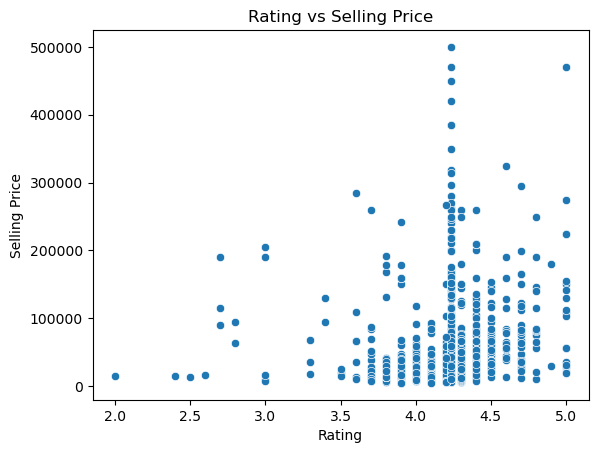

In [57]:
sns.scatterplot(x='Rating', y='Selling Price', data=df)
plt.title('Rating vs Selling Price')
plt.show()

- there is no Relationship between ratings and selling prices

## Average Selling Price by Brand

In [58]:
avg_selling_price_by_brand = df.groupby('Brand')['Selling Price'].mean()

In [59]:
avg_selling_price_by_brand

Brand
AISEN                35462.500000
Acer                 31664.666667
Adsun                15220.428571
Akai                 52002.833333
BPL                  34617.250000
Blaupunkt            23712.333333
Candes               13415.666667
CloudWalker          32331.333333
Compaq               45999.000000
Coocaa               24442.444444
Croma                22365.666667
DETEL                18110.666667
Dektron               6724.000000
Dyanora              15515.666667
G-TEN                16918.375000
HUIDI                18165.666667
Haier                36616.222222
Hisense              89795.400000
IMPEX                28819.384615
Infinix              17165.666667
Intex                27340.714286
JVC                  32496.333333
KODAK                23665.066667
KRISONS               5865.666667
LG                   96914.401639
Lloyd                34161.818182
LumX                 24858.333333
MOTOROLA             38399.000000
MURPHY               12817.250000
MarQ by 

In [60]:
top_10_brands = avg_selling_price_by_brand.sort_values(ascending=False).head(10)

In [61]:
top_10_brands

Brand
Sharp              149672.000000
Samsung            121630.000000
SAMSUNG            106409.228571
LG                  96914.401639
Hisense             89795.400000
SONY                89342.838710
TCL                 55798.318182
iFFALCON by TCL     54234.421053
Panasonic           53493.966667
Akai                52002.833333
Name: Selling Price, dtype: float64

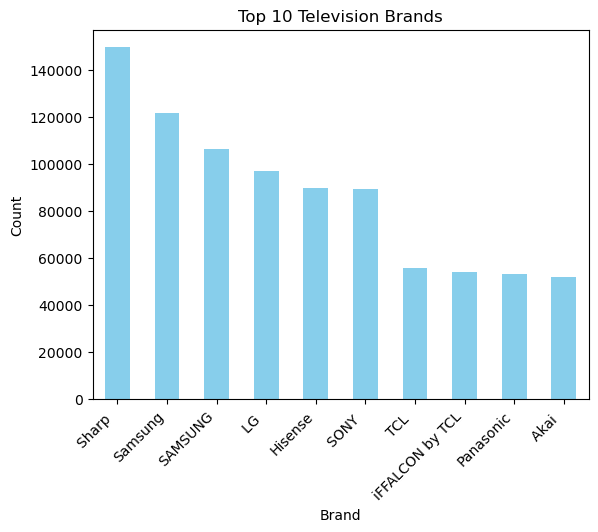

In [62]:
top_10_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Television Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- Sharp has the highest average selling price.Samsung, SAMSUNG, and LG are also among the brands with higher average selling prices, suggesting that these brands might have premium or high-end television models.

## Distribution of Operating Systems

In [66]:
df["Operating System"].value_counts(ascending=False)

Android      485
Tizen        145
Linux        127
WebOS        109
HomeOS        28
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

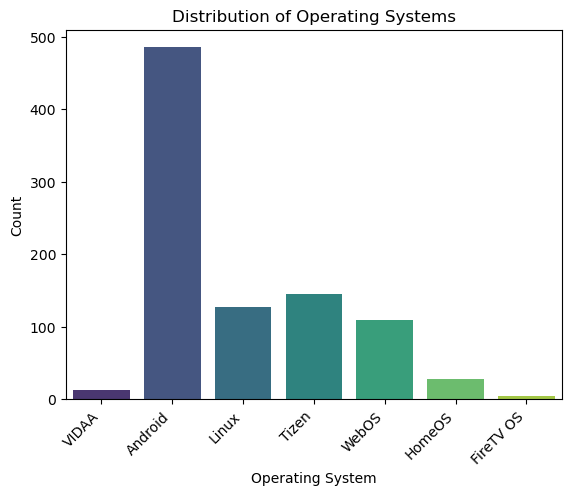

In [65]:
sns.countplot(x='Operating System', data=df, palette='viridis')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- Android is the most prevalent operating system, appearing 485 times in the dataset. This indicates a significant market share and popularity among the analyzed televisions.

# COORELATION ANALYSIS

In [63]:
df.corr()

,Size,Selling Price,Original Price,Rating
Size,1.000000,0.662693,0.730084,0.184984
Selling Price,0.662693,1.000000,0.939933,0.123073
Original Price,0.730084,0.939933,1.000000,0.126132
Rating,0.184984,0.123073,0.126132,1.000000


<Axes: >

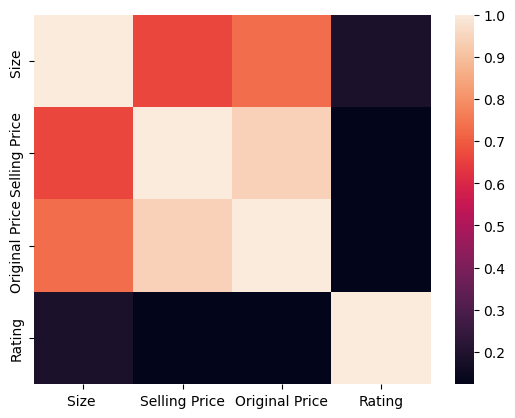

In [64]:
sns.heatmap(df.corr())

- There is a moderate positive correlation between the size of the television and its selling price. As the size increases, the selling price tends to increase.
- There is a strong positive correlation between the size of the television and its original price. Larger televisions tend to have higher original prices.
- There is a very strong positive correlation between the selling price and the original price. 
- There is a weak positive correlation between the size of the television and its rating. Larger televisions may have slightly higher ratings, but the correlation is not very strong.
- There is a weak positive correlation between the selling price and the rating.
- There is a weak positive correlation between the original price and the rating.
- There is a very weak positive correlation between the size of the television and the discount percentage.
- There is a moderate negative correlation between the selling price and the discount percentage. As the selling price increases, the discount percentage tends to decrease.
- There is a very weak positive correlation between the original price and the discount percentage. 
- There is a very weak negative correlation between the rating and the discount percentage. 

# CONCLUSIONS:

from descriptive analysis:
- now there is no missing values
- there are `59` unique brands and `SAMSUNG` with most frequent brand(140 times) 
- there are `5` unique display resolutions and `Ultra HD LED`(399) is the most common 
- The sizes range from a minimum of 17 inches to a maximum of 85 inches, with an average size of approximately 45.94 inches.
- Selling prices vary widely, with a minimum of 4,849 and a maximum of 499,990.The mean selling price is 59,358.61.
- Original prices also exhibit a considerable range, from 6,999 to 549,990.
- There are 7 unique operating systems, with `Android`(485 times) being the most common .
- Ratings range from a minimum of 2 to a maximum of 5, with an average rating of 4.23.

from univariable analysis:
- There is a high demand for televisions with `Ultra HD` resolution, indicating a preference for higher picture quality.
- `SAMSUNG` and `LG` emerge as the leading brands, possibly indicating a high level of consumer trust and market influence.
- Sharp has the highest average selling price.Samsung, SAMSUNG, and LG are also among the brands with higher average selling prices, suggesting that these brands might have premium or high-end television models.
- Android is the most prevalent operating system, appearing 485 times in the dataset. This indicates a significant market share and popularity among the analyzed televisions.

from coorelation analysis:
- There is a moderate positive correlation between the size of the television and its selling price. As the size increases, the selling price tends to increase.
- There is a strong positive correlation between the size of the television and its original price. Larger televisions tend to have higher original prices.
- There is a very strong positive correlation between the selling price and the original price. 
- There is a weak positive correlation between the size of the television and its rating. Larger televisions may have slightly higher ratings, but the correlation is not very strong.
- There is a weak positive correlation between the selling price and the rating.
- There is a weak positive correlation between the original price and the rating.
- There is a very weak positive correlation between the size of the television and the discount percentage.
- There is a moderate negative correlation between the selling price and the discount percentage. As the selling price increases, the discount percentage tends to decrease.
- There is a very weak positive correlation between the original price and the discount percentage. 
- There is a very weak negative correlation between the rating and the discount percentage. 